In [3]:
from pandas import read_csv
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import SGD
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
#from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [11]:
# load dataset
dataframe = read_csv("../data/sonar.all-data", header=None)
dataset = dataframe.values
dataset

array([[0.02, 0.0371, 0.0428, ..., 0.009, 0.0032, 'R'],
       [0.0453, 0.0523, 0.0843, ..., 0.0052, 0.0044, 'R'],
       [0.0262, 0.0582, 0.1099, ..., 0.0095, 0.0078, 'R'],
       ...,
       [0.0522, 0.0437, 0.018, ..., 0.0077, 0.0031, 'M'],
       [0.0303, 0.0353, 0.049, ..., 0.0036, 0.0048, 'M'],
       [0.026, 0.0363, 0.0136, ..., 0.0061, 0.0115, 'M']], dtype=object)

In [83]:
dataset.shape

(208, 61)

In [85]:
dataset[:,60]

array(['R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M

In [7]:
# split into input (X) and output (Y) variables
X = dataset[:,0:60].astype(float)
Y = dataset[:,60]
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
encoded_Y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [55]:
# checkpoint: store the best model
from tensorflow.keras.callbacks import ModelCheckpoint

EPOCHS = 300  # num of epochs to test for
BATCH_SIZE = 16

In [56]:
def create_tiny_model():
  # create model
    model = Sequential()
    model.add(Dense(10, input_dim=60, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    sgd = SGD(lr=0.01, momentum=0.8)
    model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, encoded_Y, test_size=0.25, random_state=0)

In [58]:
ckpt_tiny_model = 'sonar_tiny.best.hdf5'
tiny_model_checkpoint = ModelCheckpoint(ckpt_tiny_model, 
                            monitor='val_accuracy',
                            verbose=1,
                            save_best_only=True,
                            mode='max')
callbacks_list = [tiny_model_checkpoint]

tiny_model = create_tiny_model()

print('Starting training:')
# train the model, store the results for plotting
tiny_model_history = tiny_model.fit(X_train,
                    y_train,
                    validation_data=(X_test, y_test),
                    epochs=EPOCHS,
                    batch_size=BATCH_SIZE,
                    callbacks=callbacks_list,
                    verbose=0)

Starting training:

Epoch 00001: val_accuracy improved from -inf to 0.53846, saving model to sonar_tiny.best.hdf5

Epoch 00002: val_accuracy did not improve from 0.53846

Epoch 00003: val_accuracy did not improve from 0.53846

Epoch 00004: val_accuracy did not improve from 0.53846

Epoch 00005: val_accuracy did not improve from 0.53846

Epoch 00006: val_accuracy did not improve from 0.53846

Epoch 00007: val_accuracy improved from 0.53846 to 0.55769, saving model to sonar_tiny.best.hdf5

Epoch 00008: val_accuracy did not improve from 0.55769

Epoch 00009: val_accuracy did not improve from 0.55769

Epoch 00010: val_accuracy did not improve from 0.55769

Epoch 00011: val_accuracy improved from 0.55769 to 0.57692, saving model to sonar_tiny.best.hdf5

Epoch 00012: val_accuracy improved from 0.57692 to 0.59615, saving model to sonar_tiny.best.hdf5

Epoch 00013: val_accuracy did not improve from 0.59615

Epoch 00014: val_accuracy did not improve from 0.59615

Epoch 00015: val_accuracy did n


Epoch 00143: val_accuracy did not improve from 0.84615

Epoch 00144: val_accuracy did not improve from 0.84615

Epoch 00145: val_accuracy did not improve from 0.84615

Epoch 00146: val_accuracy did not improve from 0.84615

Epoch 00147: val_accuracy did not improve from 0.84615

Epoch 00148: val_accuracy did not improve from 0.84615

Epoch 00149: val_accuracy did not improve from 0.84615

Epoch 00150: val_accuracy did not improve from 0.84615

Epoch 00151: val_accuracy did not improve from 0.84615

Epoch 00152: val_accuracy did not improve from 0.84615

Epoch 00153: val_accuracy did not improve from 0.84615

Epoch 00154: val_accuracy did not improve from 0.84615

Epoch 00155: val_accuracy did not improve from 0.84615

Epoch 00156: val_accuracy did not improve from 0.84615

Epoch 00157: val_accuracy did not improve from 0.84615

Epoch 00158: val_accuracy did not improve from 0.84615

Epoch 00159: val_accuracy did not improve from 0.84615

Epoch 00160: val_accuracy did not improve from 


Epoch 00292: val_accuracy did not improve from 0.84615

Epoch 00293: val_accuracy did not improve from 0.84615

Epoch 00294: val_accuracy did not improve from 0.84615

Epoch 00295: val_accuracy did not improve from 0.84615

Epoch 00296: val_accuracy improved from 0.84615 to 0.86538, saving model to sonar_tiny.best.hdf5

Epoch 00297: val_accuracy did not improve from 0.86538

Epoch 00298: val_accuracy did not improve from 0.86538

Epoch 00299: val_accuracy did not improve from 0.86538

Epoch 00300: val_accuracy did not improve from 0.86538


In [59]:
%matplotlib inline
import matplotlib.pyplot as plt

def plot_history(history):
    print(history.history.keys())
    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


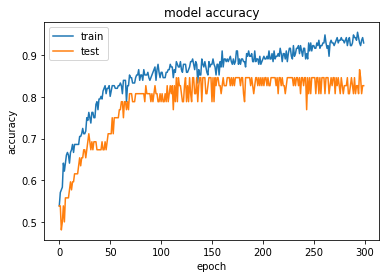

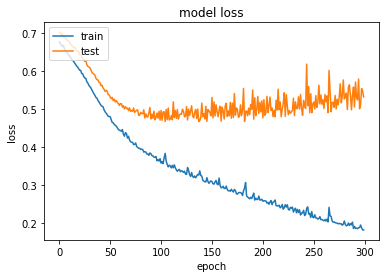

In [60]:
plot_history(tiny_model_history)

In [61]:
# baseline
def create_baseline():
  # create model
    model = Sequential()
    model.add(Dense(60, input_dim=60, activation='relu'))
    model.add(Dense(30,  activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    sgd = SGD(lr=0.01, momentum=0.8)
    model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

In [62]:
ckpt_model = 'sonar.best.hdf5'
checkpoint = ModelCheckpoint(ckpt_model, 
                            monitor='val_accuracy',
                            verbose=1,
                            save_best_only=True,
                            mode='max')
callbacks_list = [checkpoint]

model = create_baseline()

print('Starting training:')
# train the model, store the results for plotting
history = model.fit(X_train,
                    y_train,
                    validation_data=(X_test, y_test),
                    epochs=EPOCHS,
                    batch_size=BATCH_SIZE,
                    callbacks=callbacks_list,
                    verbose=0)

Starting training:

Epoch 00001: val_accuracy improved from -inf to 0.50000, saving model to sonar.best.hdf5

Epoch 00002: val_accuracy improved from 0.50000 to 0.55769, saving model to sonar.best.hdf5

Epoch 00003: val_accuracy improved from 0.55769 to 0.57692, saving model to sonar.best.hdf5

Epoch 00004: val_accuracy improved from 0.57692 to 0.59615, saving model to sonar.best.hdf5

Epoch 00005: val_accuracy did not improve from 0.59615

Epoch 00006: val_accuracy did not improve from 0.59615

Epoch 00007: val_accuracy did not improve from 0.59615

Epoch 00008: val_accuracy did not improve from 0.59615

Epoch 00009: val_accuracy did not improve from 0.59615

Epoch 00010: val_accuracy improved from 0.59615 to 0.61538, saving model to sonar.best.hdf5

Epoch 00011: val_accuracy did not improve from 0.61538

Epoch 00012: val_accuracy improved from 0.61538 to 0.63462, saving model to sonar.best.hdf5

Epoch 00013: val_accuracy did not improve from 0.63462

Epoch 00014: val_accuracy did not


Epoch 00140: val_accuracy did not improve from 0.88462

Epoch 00141: val_accuracy did not improve from 0.88462

Epoch 00142: val_accuracy did not improve from 0.88462

Epoch 00143: val_accuracy did not improve from 0.88462

Epoch 00144: val_accuracy did not improve from 0.88462

Epoch 00145: val_accuracy did not improve from 0.88462

Epoch 00146: val_accuracy did not improve from 0.88462

Epoch 00147: val_accuracy did not improve from 0.88462

Epoch 00148: val_accuracy did not improve from 0.88462

Epoch 00149: val_accuracy did not improve from 0.88462

Epoch 00150: val_accuracy did not improve from 0.88462

Epoch 00151: val_accuracy did not improve from 0.88462

Epoch 00152: val_accuracy did not improve from 0.88462

Epoch 00153: val_accuracy did not improve from 0.88462

Epoch 00154: val_accuracy did not improve from 0.88462

Epoch 00155: val_accuracy did not improve from 0.88462

Epoch 00156: val_accuracy did not improve from 0.88462

Epoch 00157: val_accuracy did not improve from 


Epoch 00289: val_accuracy did not improve from 0.88462

Epoch 00290: val_accuracy did not improve from 0.88462

Epoch 00291: val_accuracy did not improve from 0.88462

Epoch 00292: val_accuracy did not improve from 0.88462

Epoch 00293: val_accuracy did not improve from 0.88462

Epoch 00294: val_accuracy did not improve from 0.88462

Epoch 00295: val_accuracy did not improve from 0.88462

Epoch 00296: val_accuracy did not improve from 0.88462

Epoch 00297: val_accuracy did not improve from 0.88462

Epoch 00298: val_accuracy did not improve from 0.88462

Epoch 00299: val_accuracy did not improve from 0.88462

Epoch 00300: val_accuracy did not improve from 0.88462


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


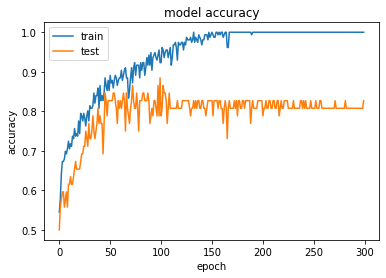

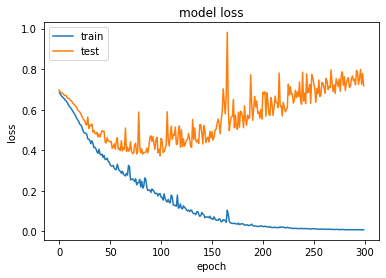

In [63]:

plot_history(history)

In [64]:
from  tensorflow.keras import regularizers
def create_l2_model():
  # create model
    model = Sequential()
    model.add(Dense(60, input_dim=60, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(Dense(30,  activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    sgd = SGD(lr=0.01, momentum=0.8)
    model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

In [67]:
ckpt_model_l2 = 'sonar_l2.best.hdf5'
checkpoint_l2 = ModelCheckpoint(ckpt_model_l2, 
                            monitor='val_accuracy',
                            verbose=1,
                            save_best_only=True,
                            mode='max')
callbacks_list = [checkpoint_l2]

l2_model = create_l2_model()

print('Starting training:')
# train the model, store the results for plotting
l2_history = l2_model.fit(X_train,
                    y_train,
                    validation_data=(X_test, y_test),
                    epochs=EPOCHS,
                    batch_size=BATCH_SIZE,
                    callbacks=callbacks_list,
                    verbose=0)

Starting training:

Epoch 00001: val_accuracy improved from -inf to 0.55769, saving model to sonar_l2.best.hdf5

Epoch 00002: val_accuracy did not improve from 0.55769

Epoch 00003: val_accuracy did not improve from 0.55769

Epoch 00004: val_accuracy did not improve from 0.55769

Epoch 00005: val_accuracy did not improve from 0.55769

Epoch 00006: val_accuracy did not improve from 0.55769

Epoch 00007: val_accuracy did not improve from 0.55769

Epoch 00008: val_accuracy improved from 0.55769 to 0.59615, saving model to sonar_l2.best.hdf5

Epoch 00009: val_accuracy did not improve from 0.59615

Epoch 00010: val_accuracy improved from 0.59615 to 0.61538, saving model to sonar_l2.best.hdf5

Epoch 00011: val_accuracy improved from 0.61538 to 0.63462, saving model to sonar_l2.best.hdf5

Epoch 00012: val_accuracy improved from 0.63462 to 0.65385, saving model to sonar_l2.best.hdf5

Epoch 00013: val_accuracy improved from 0.65385 to 0.67308, saving model to sonar_l2.best.hdf5

Epoch 00014: va


Epoch 00144: val_accuracy did not improve from 0.86538

Epoch 00145: val_accuracy did not improve from 0.86538

Epoch 00146: val_accuracy did not improve from 0.86538

Epoch 00147: val_accuracy did not improve from 0.86538

Epoch 00148: val_accuracy did not improve from 0.86538

Epoch 00149: val_accuracy did not improve from 0.86538

Epoch 00150: val_accuracy did not improve from 0.86538

Epoch 00151: val_accuracy did not improve from 0.86538

Epoch 00152: val_accuracy did not improve from 0.86538

Epoch 00153: val_accuracy did not improve from 0.86538

Epoch 00154: val_accuracy did not improve from 0.86538

Epoch 00155: val_accuracy did not improve from 0.86538

Epoch 00156: val_accuracy did not improve from 0.86538

Epoch 00157: val_accuracy did not improve from 0.86538

Epoch 00158: val_accuracy did not improve from 0.86538

Epoch 00159: val_accuracy did not improve from 0.86538

Epoch 00160: val_accuracy did not improve from 0.86538

Epoch 00161: val_accuracy did not improve from 


Epoch 00299: val_accuracy did not improve from 0.86538

Epoch 00300: val_accuracy did not improve from 0.86538


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


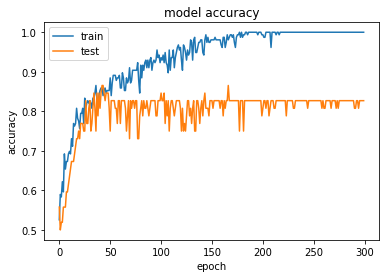

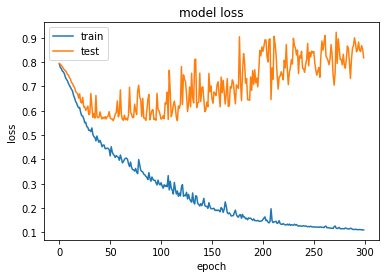

In [68]:
plot_history(l2_history)

In [79]:
from tensorflow.keras.layers import Dropout
def create_dropout_model():
  # create model
    model = Sequential()
    model.add(Dense(60, input_dim=60, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(Dropout(0.7))
    model.add(Dense(30,  activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(Dropout(0.8))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    sgd = SGD(lr=0.01, momentum=0.8)
    model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

In [80]:
ckpt_model_dropout = 'sonar_dropout.best.hdf5'
checkpoint_dropout = ModelCheckpoint(ckpt_model_dropout, 
                            monitor='val_accuracy',
                            verbose=1,
                            save_best_only=True,
                            mode='max')
callbacks_list = [checkpoint_dropout]

dropout_model = create_dropout_model()

print('Starting training:')
# train the model, store the results for plotting
dropout_history = dropout_model.fit(X_train,
                    y_train,
                    validation_data=(X_test, y_test),
                    epochs=EPOCHS,
                    batch_size=BATCH_SIZE,
                    callbacks=callbacks_list,
                    verbose=0)

Starting training:

Epoch 00001: val_accuracy improved from -inf to 0.57692, saving model to sonar_dropout.best.hdf5

Epoch 00002: val_accuracy did not improve from 0.57692

Epoch 00003: val_accuracy did not improve from 0.57692

Epoch 00004: val_accuracy did not improve from 0.57692

Epoch 00005: val_accuracy did not improve from 0.57692

Epoch 00006: val_accuracy did not improve from 0.57692

Epoch 00007: val_accuracy did not improve from 0.57692

Epoch 00008: val_accuracy did not improve from 0.57692

Epoch 00009: val_accuracy did not improve from 0.57692

Epoch 00010: val_accuracy did not improve from 0.57692

Epoch 00011: val_accuracy did not improve from 0.57692

Epoch 00012: val_accuracy did not improve from 0.57692

Epoch 00013: val_accuracy did not improve from 0.57692

Epoch 00014: val_accuracy did not improve from 0.57692

Epoch 00015: val_accuracy did not improve from 0.57692

Epoch 00016: val_accuracy did not improve from 0.57692

Epoch 00017: val_accuracy did not improve 


Epoch 00143: val_accuracy did not improve from 0.82692

Epoch 00144: val_accuracy did not improve from 0.82692

Epoch 00145: val_accuracy did not improve from 0.82692

Epoch 00146: val_accuracy did not improve from 0.82692

Epoch 00147: val_accuracy did not improve from 0.82692

Epoch 00148: val_accuracy did not improve from 0.82692

Epoch 00149: val_accuracy did not improve from 0.82692

Epoch 00150: val_accuracy did not improve from 0.82692

Epoch 00151: val_accuracy did not improve from 0.82692

Epoch 00152: val_accuracy did not improve from 0.82692

Epoch 00153: val_accuracy did not improve from 0.82692

Epoch 00154: val_accuracy did not improve from 0.82692

Epoch 00155: val_accuracy did not improve from 0.82692

Epoch 00156: val_accuracy did not improve from 0.82692

Epoch 00157: val_accuracy did not improve from 0.82692

Epoch 00158: val_accuracy did not improve from 0.82692

Epoch 00159: val_accuracy did not improve from 0.82692

Epoch 00160: val_accuracy did not improve from 


Epoch 00293: val_accuracy did not improve from 0.86538

Epoch 00294: val_accuracy did not improve from 0.86538

Epoch 00295: val_accuracy did not improve from 0.86538

Epoch 00296: val_accuracy did not improve from 0.86538

Epoch 00297: val_accuracy did not improve from 0.86538

Epoch 00298: val_accuracy did not improve from 0.86538

Epoch 00299: val_accuracy did not improve from 0.86538

Epoch 00300: val_accuracy did not improve from 0.86538


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


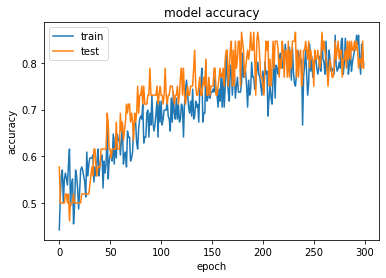

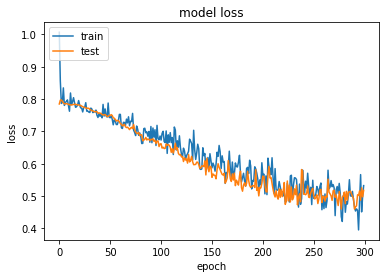

In [81]:
plot_history(dropout_history)